In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor

In [164]:
train=pd.read_csv(r'D:\Downloads\Grocery_Sales_ParticipantsData\Grocery_Sales_ParticipantsData\Train.csv')
test=pd.read_csv(r'D:\Downloads\Grocery_Sales_ParticipantsData\Grocery_Sales_ParticipantsData\Test.csv')
train.head()

,Day,GrocerySales
0,1,8418.59
1,2,8447.47
2,3,8336.49
3,4,8579.17
4,5,8524.31


In [165]:
train.shape

(692, 2)

In [166]:
date=pd.date_range('1/1/2018','31/12/2018').append(pd.date_range('1/1/2019','31/12/2019'))
train['date']=date[:len(train)]
train=train.dropna()
train.shape

(692, 3)

In [167]:
train['year']=train.date.dt.year
train['day']=train.date.dt.day
train['month']=train.date.dt.month
train['week']=train.date.dt.week
train['dayofyear']=train.date.dt.dayofyear

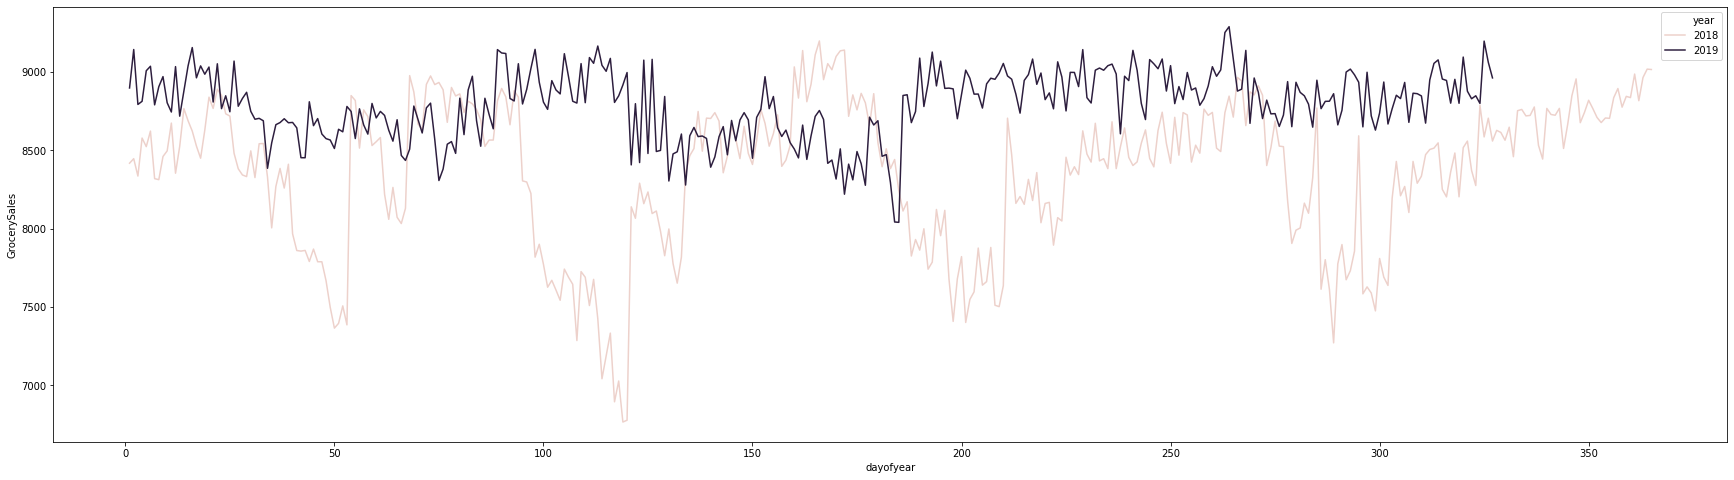

In [168]:
plt.figure(figsize=(30,8))
sns.lineplot(x='dayofyear',y='GrocerySales',data=train,hue='year')

In [169]:
train.tail()

,Day,GrocerySales,date,year,day,month,week,dayofyear
687,688,8848.98,2019-11-19,2019,19,11,47,323
688,689,8800.45,2019-11-20,2019,20,11,47,324
689,690,9197.99,2019-11-21,2019,21,11,47,325
690,691,9062.44,2019-11-22,2019,22,11,47,326
691,692,8963.12,2019-11-23,2019,23,11,47,327


In [170]:
test=pd.DataFrame(pd.date_range('24/11/2019','21/02/2020'),columns=['date'])
test['day']=test.date.dt.day
test['month']=test.date.dt.month
test['week']=test.date.dt.week
test['dayofyear']=test.date.dt.dayofyear
test.head()

,date,day,month,week,dayofyear
0,2019-11-24,24,11,47,328
1,2019-11-25,25,11,48,329
2,2019-11-26,26,11,48,330
3,2019-11-27,27,11,48,331
4,2019-11-28,28,11,48,332


In [175]:
label=train.loc[train.year==2019]['GrocerySales']
feature=train.loc[train.year==2019].iloc[:,4:]

In [176]:
lgb=LGBMRegressor(max_depth=50,n_estimators=200,subsample_for_bin=500).fit(feature,label)
y_pred=lgb.predict(test.iloc[:,1:])

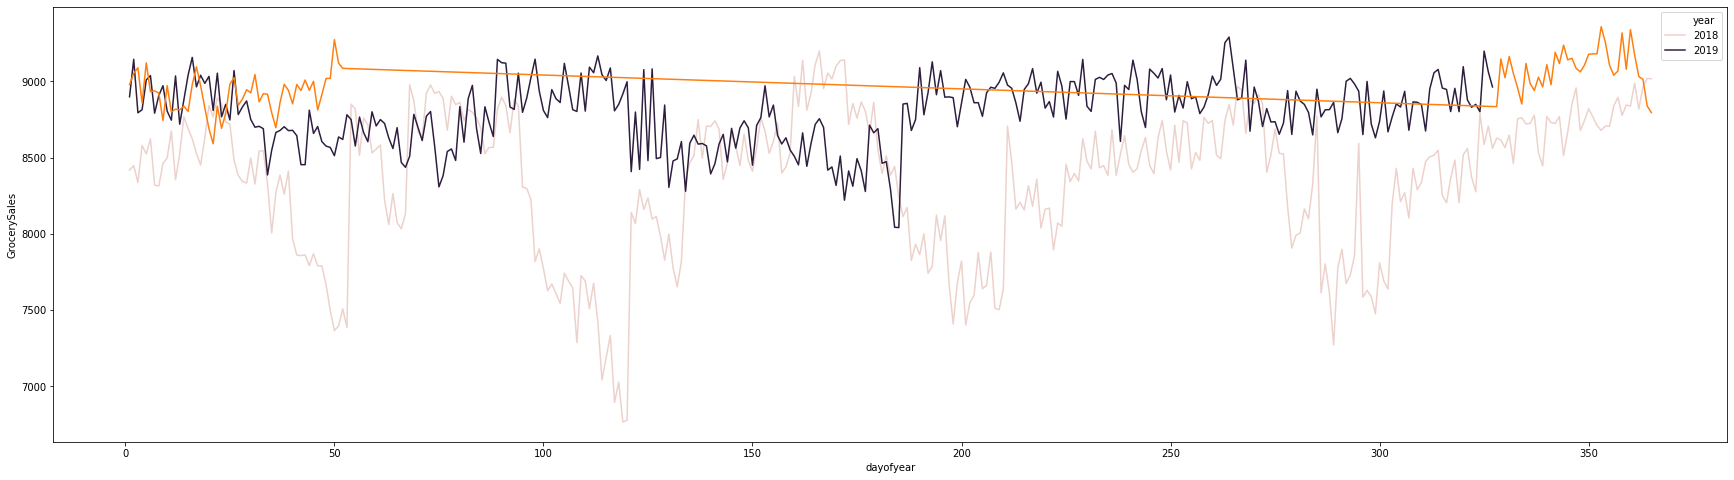

In [227]:
t=test.copy()
t['GrocerySales']=y_pred.values
plt.figure(figsize=(30,8))
sns.lineplot(x='dayofyear',y='GrocerySales',data=train,hue='year')
sns.lineplot(x='dayofyear',y='GrocerySales',data=t)

In [269]:
pd.Series(y_pred,name='GrocerySales').to_excel(r'C:\Users\pankaj\Desktop\Groceryholt90.xlsx',index=False)

In [77]:
len(y_pred)

90

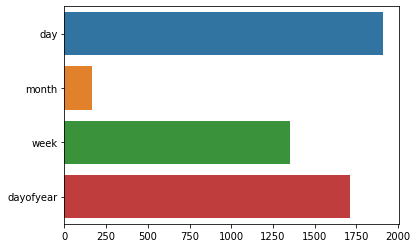

In [74]:
sns.barplot(y=feature.columns,x=lgb.feature_importances_)

In [265]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,Holt
es=ExponentialSmoothing(endog=train.GrocerySales,trend='additive',seasonal='multiplicative',seasonal_periods=90).fit(smoothing_level=.5,smoothing_slope=.01,smoothing_seasonal=.4)

C:\Users\pankaj\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\pankaj\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [266]:
y_pred=es.forecast(90)

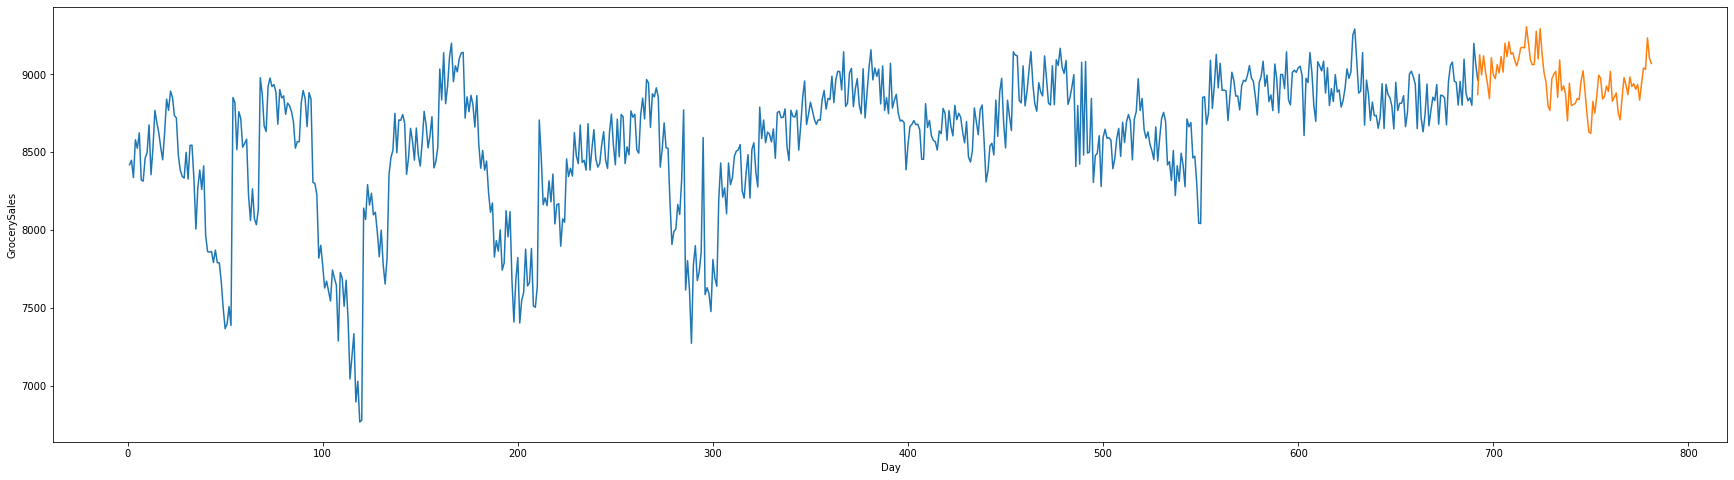

In [267]:
train['predict']=y_pred
plt.figure(figsize=(30,8))
sns.lineplot(x='Day',y='GrocerySales',data=train)
sns.lineplot(x=y_pred.index,y=y_pred.values)

Int64Index([ 692,  693,  694,  695,  696,  697,  698,  699,  700,  701,
            ...
            1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383],
           dtype='int64', length=692)